# Kampus Merdeka 6: IBM & Skilvul
# Data Science Phase Challenge

- NAMA : PUTRI DANTY APRIANI
- UNIVERSITAS SRIWIJAYA

# Problem Definition
## Latar Belakang
Dalam industri perbankan yang retensi pelanggan menjadi kunci untuk pertumbuhan berkelanjutan sebuah bank. Tantangan utama yang dihadapi adalah churn atau kehilangan pelanggan, yang dapat memiliki dampak finansial dan reputasi yang signifikan. Dengan perubahan perilaku konsumen yang terus berubah dan biaya akuisisi pelanggan yang tinggi, bank harus memahami faktor-faktor yang mempengaruhi keputusan nasabah untuk tetap setia atau beralih ke penyedia layanan yang lain. Dengan menggunakan analisis data dan machine learning untuk menganalisis data transaksi, perilaku nasabah, dan riwayat kredit, bank dapat mengidentifikasi pola perilaku yang menunjukkan kemungkinan churn. Dengan demikian, mereka dapat mengambil tindakan untuk meminimalkan churn dan mempertahankan basis pelanggan yang stabil serta memastikan pertumbuhan bisnis yang berkelanjutan.

## Tujuan Penelitian
Tujuan penelitian ini adalah untuk mengembangkan model prediksi churn yang efektif dalam industri perbankan dengan menggunakan teknik analisis data dan machine learning. Dengan memanfaatkan data transaksi, perilaku nasabah, dan riwayat kredit yang tersedia, penelitian ini bertujuan untuk mengidentifikasi pola-pola yang mengindikasikan kemungkinan churn nasabah. Melalui pemodelan prediktif, tujuannya adalah untuk membangun alat yang dapat membantu bank dalam memprediksi dan mengambil tindakan pencegahan yang sesuai untuk mempertahankan nasabah yang potensial untuk churn. Dengan demikian, penelitian ini berupaya untuk membantu bank meningkatkan retensi pelanggan, mengurangi biaya akuisisi pelanggan baru, dan memastikan pertumbuhan bisnis yang berkelanjutan dalam lingkungan yang sangat kompetitif.

## Rumusan Masalah
1. Bagaimana mengembangkan model prediksi churn yang dapat mengidentifikasi pola-pola perilaku nasabah yang berkorelasi dengan kemungkinan churn dalam industri perbankan?
2. Bagaimana menerapkan teknik analisis data dan machine learning untuk memanfaatkan dataset yang tersedia?
3. Bagaimana model yang dikembangkan dapat membantu bank dalam mengambil tindakan pencegahan yang tepat untuk mempertahankan nasabah yang potensial untuk churn?

## Data yang akan dipakai
- Nama dataset : Churn_Modelling.csv
- Sumber dataset : https://www.kaggle.com/code/kdsharma/banking-churn-analysis-modeling/input
- Deskripsi dataset :
Kumpulan data ini berisi rincian nasabah bank dan variabel targetnya adalah variabel biner yang mencerminkan fakta apakah nasabah meninggalkan bank (menutup rekeningnya) atau tetap menjadi nasabah.

## Metode
Pada percobaan saya menggunakan beberapa model yaitu:

Suppervised Learning
1. Logistic Regression: Menggunakan fungsi logistik untuk memodelkan probabilitas bahwa suatu contoh data termasuk dalam kelas tertentu.
2. Support Vector Machines (SVM): Mencari hyperplane terbaik yang memisahkan dua kelas dalam ruang fitur dengan margin terbesar.
3. Random Forest: Menggunakan ensemble dari banyak pohon keputusan yang dibuat secara acak untuk melakukan klasifikasi.
4. K-Nearest Neighbors (KNN): Memprediksi label suatu contoh data dengan mencari k tetangga terdekatnya dalam ruang fitur.
5. Decision Tree: Membangun struktur pohon di mana setiap simpul mewakili keputusan berdasarkan fitur-fitur data.
6. Neural Networks: Model yang terdiri dari lapisan-lapisan neuron yang saling terhubung, yang belajar memetakan input ke output melalui proses pelatihan.


# Preparation | Persiapan
## Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score
from sklearn.metrics import classification_report, accuracy_score

from sklearn.metrics import confusion_matrix

C:\Users\user\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


## Get Data | Mendapatkan Data

In [2]:
data = pd.read_csv('Churn_Modelling.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Explore Data (EDA) | Eksplorasi Data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


- RowNumber : Kemungkinan merupakan pengidentifikasi unik untuk setiap catatan dan tidak berkontribusi langsung pada analisis.
- CustomerId : Dapat digunakan untuk melacak dan membedakan masing-masing pelanggan dalam kumpulan data.
- Surname : Memberikan informasi tentang nama keluarga setiap pelanggan.
- CreditScore : Ini adalah nilai numerik yang menilai kelayakan kredit seseorang berdasarkan riwayat kredit dan perilaku keuangannya.
- Geography : Memberikan informasi tentang distribusi geografis pelanggan, memungkinkan analisis berdasarkan faktor regional atau nasional.
- Gender: Ini mengkategorikan pelanggan sebagai laki-laki atau perempuan, memungkinkan analisis berbasis gender jika relevan dengan prediksi churn.
- Age : Ini mewakili usia pelanggan dalam beberapa tahun dan dapat digunakan untuk menganalisis pola dan perilaku terkait usia.
- Tenure : Biasanya mewakili jumlah tahun atau bulan nasabah telah dikaitkan dengan bank.
- Balance : Ini mencerminkan jumlah uang di rekening bank pelanggan pada waktu tertentu.
- NumOfProducts : Ini dapat mencakup berbagai penawaran seperti rekening tabungan, pinjaman, kartu kredit, dll.
- HasCrCard : Ini adalah variabel biner dengan nilai 1 jika pelanggan memiliki kartu kredit dan 0 sebaliknya.
- IsActiveMember : Ini adalah variabel biner yang menunjukkan apakah nasabah adalah anggota aktif (1) atau tidak (0) dalam bank.
- EstimatedSalary : Memberikan perkiraan tingkat pendapatan pelanggan, yang mungkin relevan untuk menganalisis perilaku churn.
- Exited : Menunjukkan apakah nasabah sudah churn (1) atau belum (0) dari bank. Ini adalah variabel yang ingin kami prediksi menggunakan fitur lainnya.

In [4]:
data.shape

(10000, 14)

In [5]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
data.duplicated().sum()

0

In [7]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


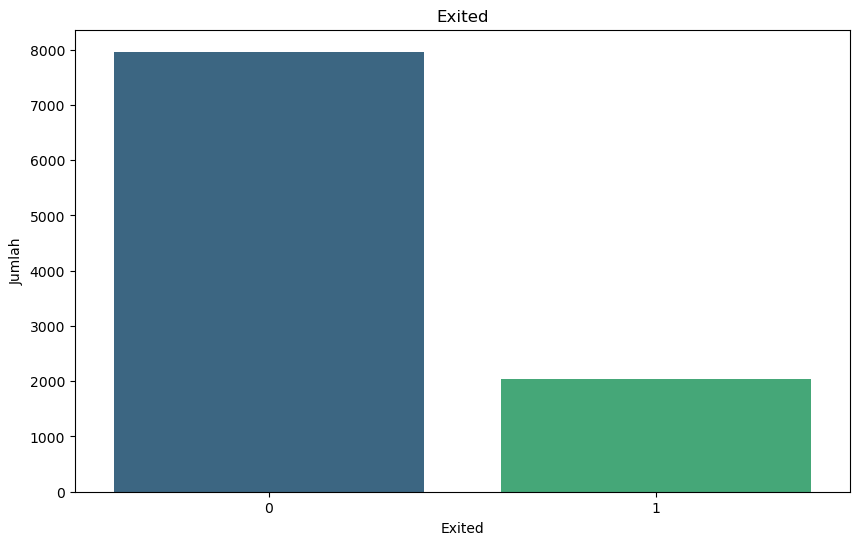

In [8]:
variety_counts = data['Exited'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=variety_counts.index, y=variety_counts.values, palette='viridis')
plt.title('Exited')
plt.xlabel('Exited')
plt.ylabel('Jumlah')

plt.show()

Fitur Exited dipilih sebagai fitur target yang mempunyai label 0 dan 1

## Clean Data | Membersihkan Data

Menghapus fitur "RowNumber","CustomerId" dan "Surname" karena tidak digunakan.

In [9]:
data.drop(columns=["RowNumber","CustomerId","Surname"],inplace=True)
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


Variabel Target yang digunakan adalah fitur Exited yang akan di ganti namanya menjadi Churn.

In [10]:
data["Geography"] = data["Geography"].replace({'France': "1", 'Spain': "2", 'Germany': "3"})
data["Gender"] = data["Gender"].replace({'Male': "1", 'Female': "2"})
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,1,2,42,2,0.00,1,1,1,101348.88,1
1,608,2,2,41,1,83807.86,1,0,1,112542.58,0
2,502,1,2,42,8,159660.80,3,1,0,113931.57,1
3,699,1,2,39,1,0.00,2,0,0,93826.63,0
4,850,2,2,43,2,125510.82,1,1,1,79084.10,0


In [11]:
data['Geography'] = data['Geography'].astype(np.int64)
data['Gender'] = data['Gender'].astype(np.int64)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  int64  
 2   Gender           10000 non-null  int64  
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9)
memory usage: 859.5 KB


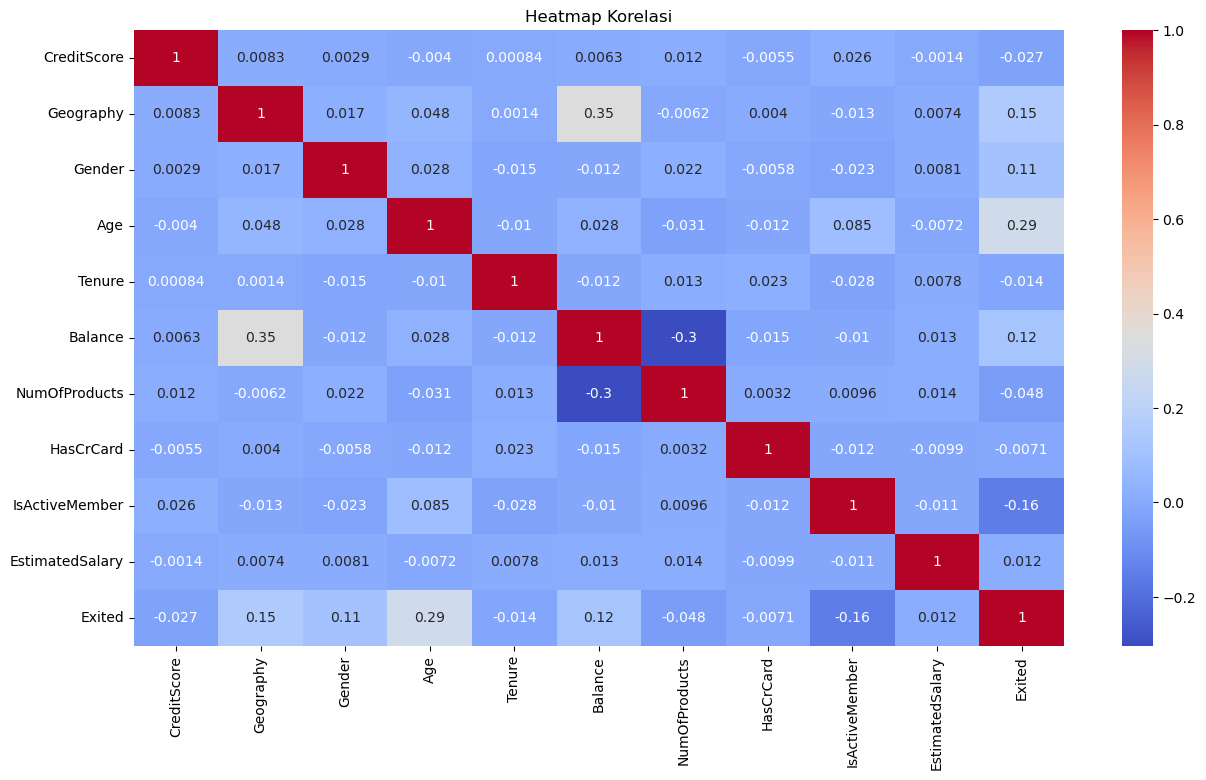

In [12]:
# Membuat heatmap menggunakan Seaborn
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')

# Menambahkan judul
plt.title('Heatmap Korelasi')

# Menampilkan heatmap
plt.show()

In [13]:
data.rename(columns={"Exited":"Churn"},inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  int64  
 2   Gender           10000 non-null  int64  
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Churn            10000 non-null  int64  
dtypes: float64(2), int64(9)
memory usage: 859.5 KB


In [14]:
data["Churn"].replace({0:"No",1:"Yes"},inplace=True)
data.head()

C:\Users\user\AppData\Local\Temp\ipykernel_14716\3783815608.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Churn"].replace({0:"No",1:"Yes"},inplace=True)


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
0,619,1,2,42,2,0.00,1,1,1,101348.88,Yes
1,608,2,2,41,1,83807.86,1,0,1,112542.58,No
2,502,1,2,42,8,159660.80,3,1,0,113931.57,Yes
3,699,1,2,39,1,0.00,2,0,0,93826.63,No
4,850,2,2,43,2,125510.82,1,1,1,79084.10,No


In [15]:
def countplot(column):
    plt.figure(figsize=(15,6))
    ax = sns.countplot(x=column, data=data, hue="Churn", palette={"Yes": "blue", "No": "red"})
    for value in ax.patches:
        x = value.get_x()
        y = value.get_y()


    plt.legend(title='Churn', fontsize=15)
    plt.title(f"Customer Churn dari {column}", size=20, pad=20)
    plt.xlabel(column, size=15)
    plt.show()

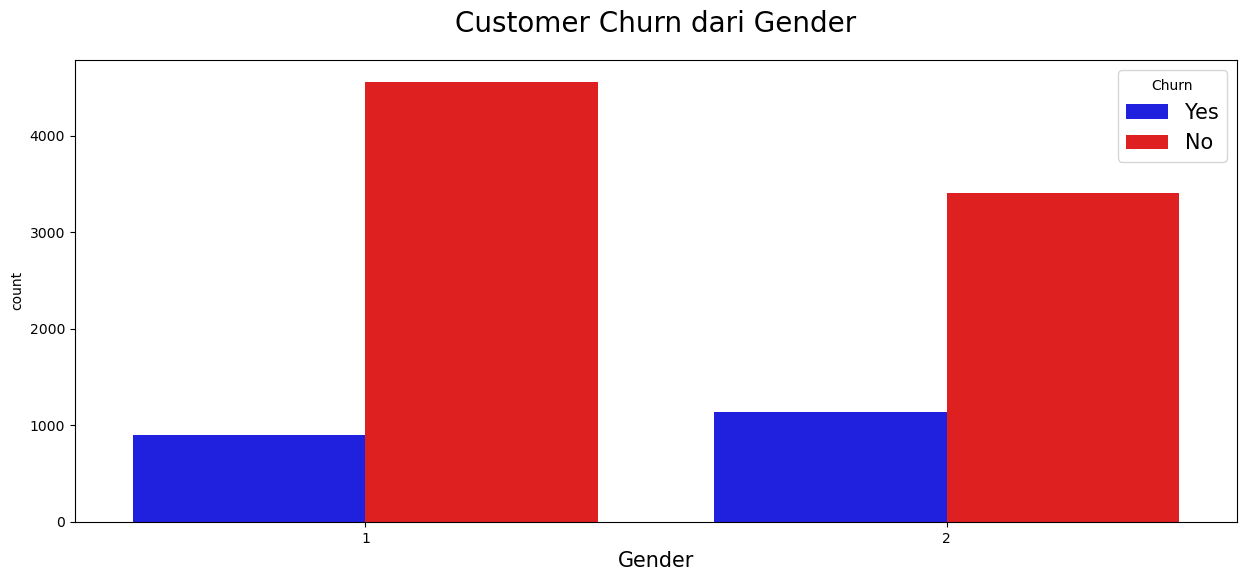

In [16]:
countplot("Gender")

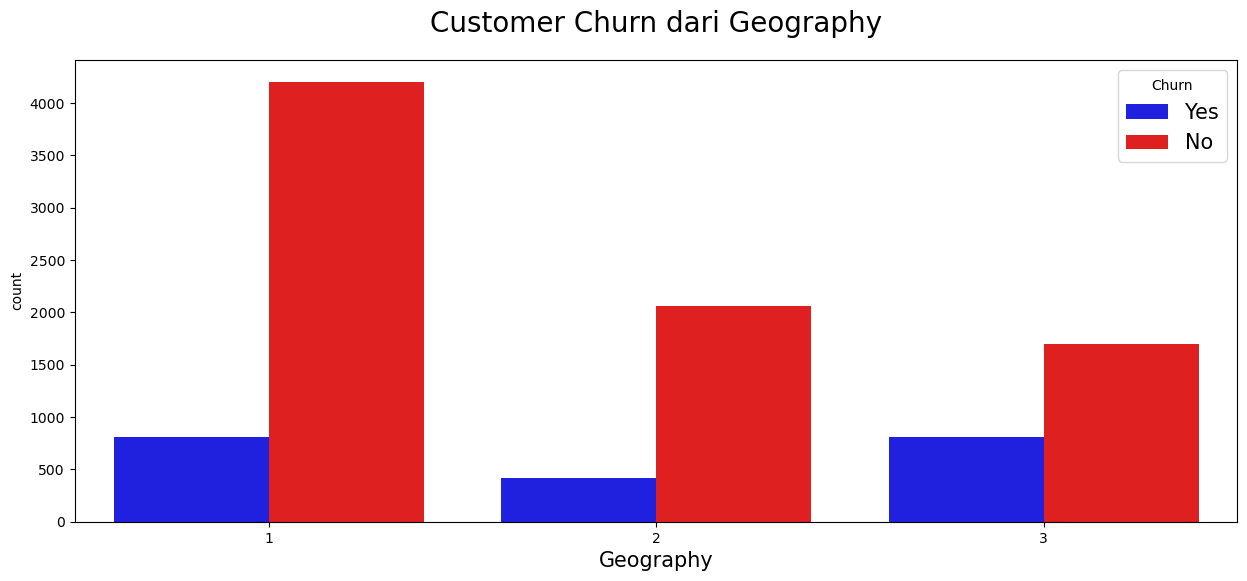

In [17]:
countplot("Geography")

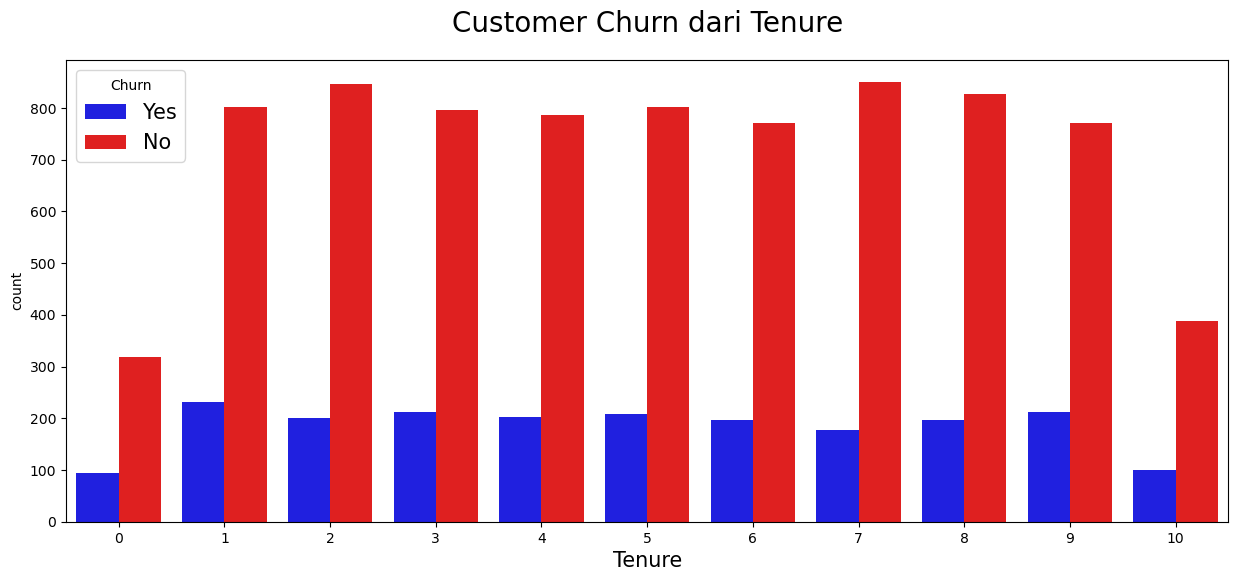

In [18]:
countplot("Tenure")

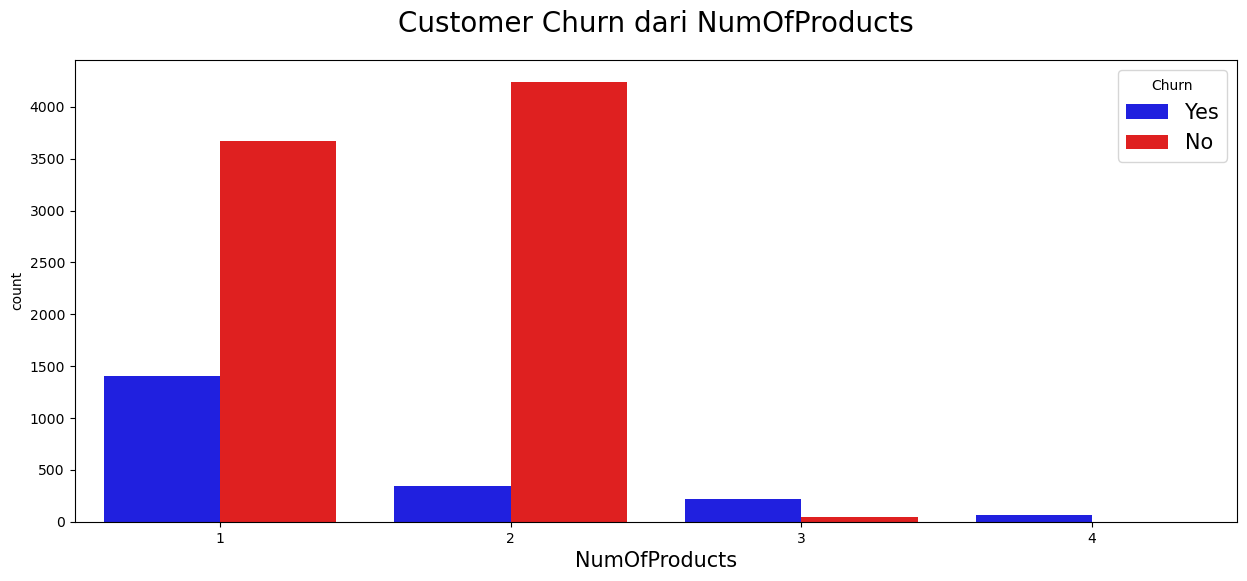

In [19]:
countplot("NumOfProducts")

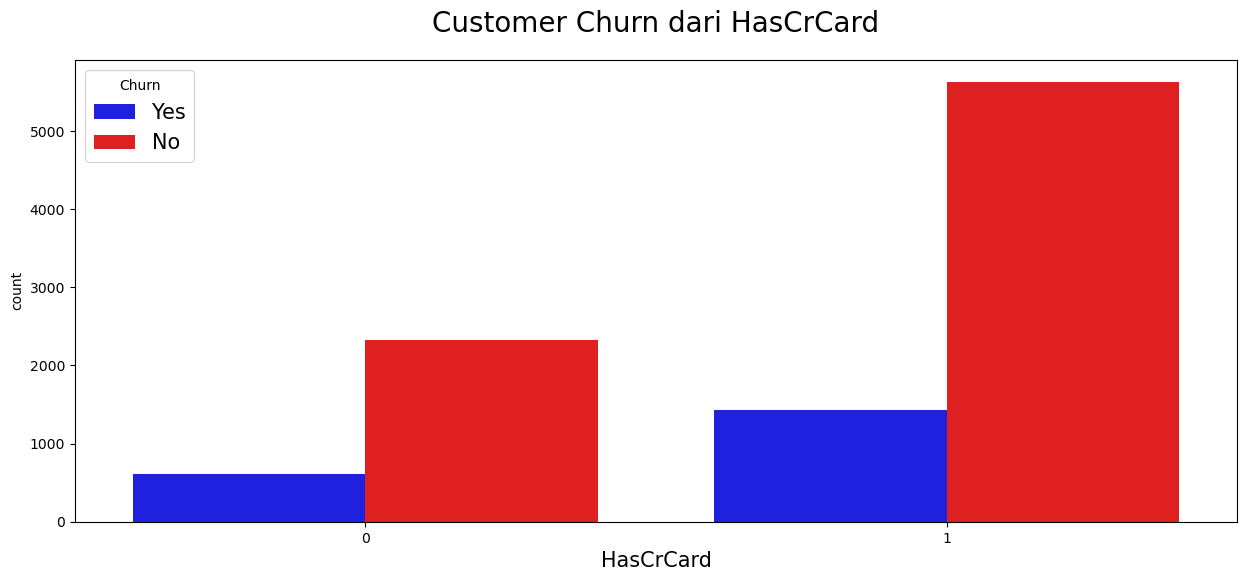

In [20]:
countplot("HasCrCard")

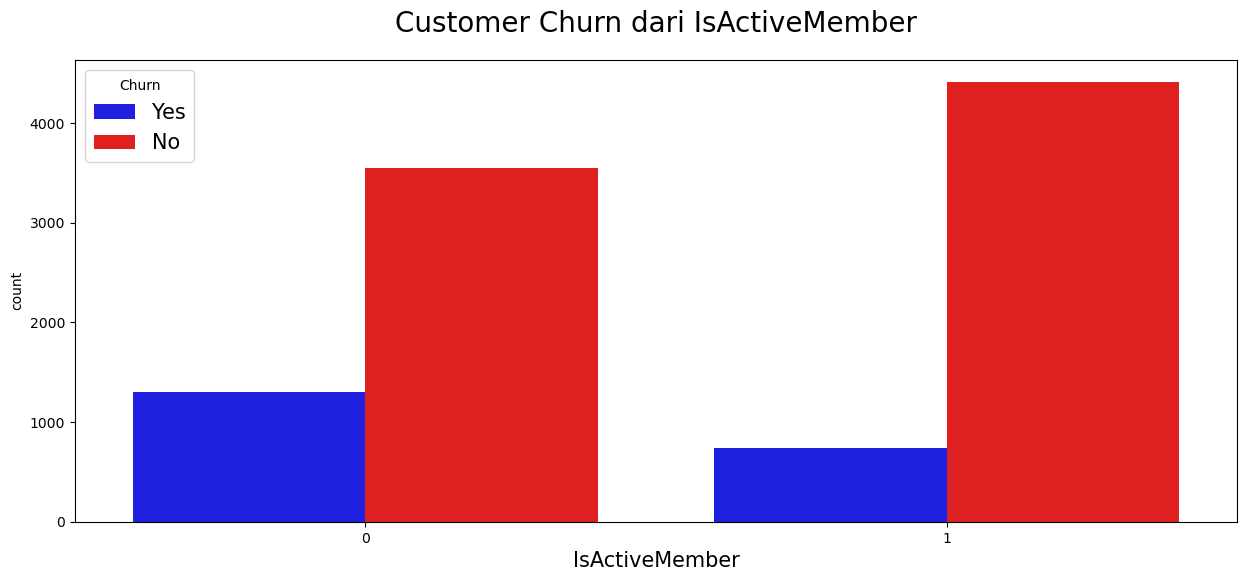

In [21]:
countplot("IsActiveMember")

In [22]:
def boxplot(column):
    plt.figure(figsize=(8,4))
    ax = sns.boxplot(x=column, data=data)

    plt.title(f"Boxplot Cek Outlier dari {column}", size=10, pad=10)
    plt.xlabel(column, size=10)
    plt.show()


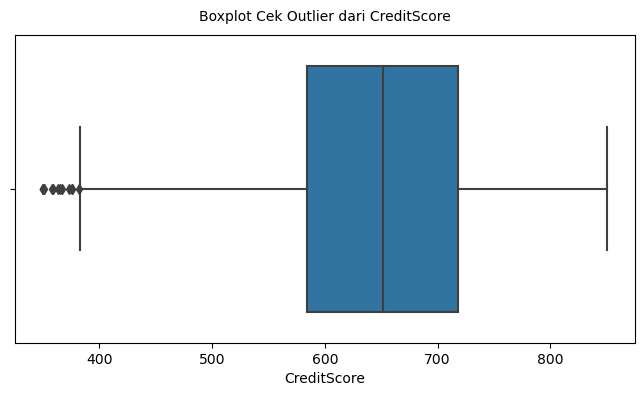

In [23]:
boxplot("CreditScore")

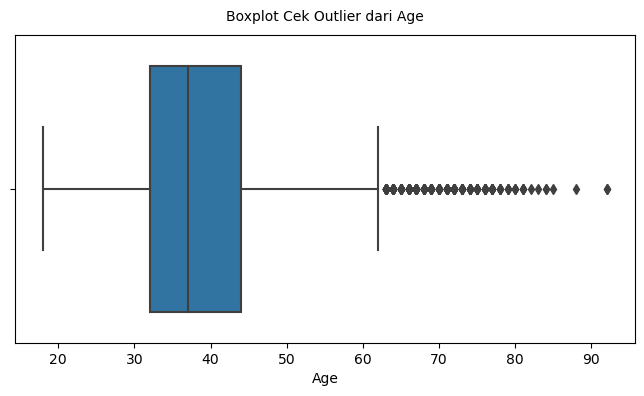

In [24]:
boxplot("Age")

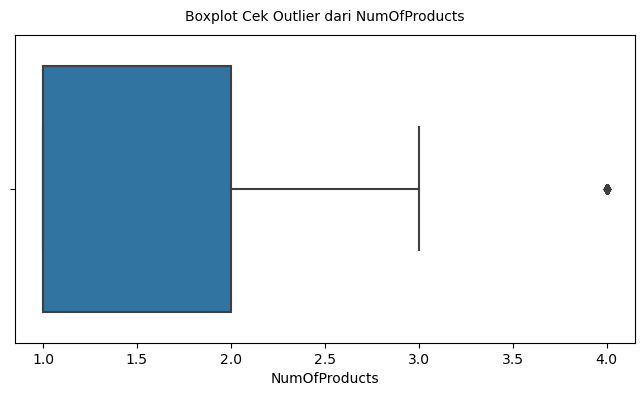

In [25]:
boxplot("NumOfProducts")

Saya tidak akan menghapus outlier tersebut karena outlier dapat memberikan informasi yang berharga tentang distribusi data dan karakteristik yang unik dari beberapa pengamatan. Menghapus outlier dapat menyebabkan kehilangan informasi penting yang dapat mempengaruhi pemodelan dan analisis.

### Data Preprocessing

In [26]:
# Encoding Target Variable

data["Churn"].replace({"No":0,"Yes":1}, inplace=True)
data.head()

C:\Users\user\AppData\Local\Temp\ipykernel_14716\2506320126.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["Churn"].replace({"No":0,"Yes":1}, inplace=True)


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
0,619,1,2,42,2,0.00,1,1,1,101348.88,1
1,608,2,2,41,1,83807.86,1,0,1,112542.58,0
2,502,1,2,42,8,159660.80,3,1,0,113931.57,1
3,699,1,2,39,1,0.00,2,0,0,93826.63,0
4,850,2,2,43,2,125510.82,1,1,1,79084.10,0


# Model Training | Pelatihan Model

In [27]:
X = data.drop(columns=["Churn"])
y = data["Churn"]

In [28]:
from imblearn.over_sampling import SMOTE

In [29]:
X_res, y_res = SMOTE().fit_resample(X,y)

Selanjutnya melakukan oversampling pada dataset yang tidak seimbang (imbalanced dataset) menggunakan metode SMOTE (Synthetic Minority Over-sampling Technique).

In [30]:
y_res.value_counts()

Churn
1    7963
0    7963
Name: count, dtype: int64

In [31]:
X_train,X_test,y_train,y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=1)

In [32]:
print("Shape of X_train is:",X_train.shape)
print("Shape of X_test is: ",X_test.shape)
print("Shape of y_train is:",y_train.shape)
print("Shape of y_test is: ",y_test.shape)

Shape of X_train is: (12740, 10)
Shape of X_test is:  (3186, 10)
Shape of y_train is: (12740,)
Shape of y_test is:  (3186,)


### Feature Scaling

In [33]:
sc = StandardScaler()

In [34]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Model Evaluation | Evaluasi Model

### 1. Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [37]:
y_pred1 = logreg.predict(X_test)

In [38]:
# Evaluasi model
print("Accuracy:", accuracy_score(y_test, y_pred1))
print(classification_report(y_test, y_pred1))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred1)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.7385436283741369
              precision    recall  f1-score   support

           0       0.73      0.73      0.73      1534
           1       0.75      0.75      0.75      1652

    accuracy                           0.74      3186
   macro avg       0.74      0.74      0.74      3186
weighted avg       0.74      0.74      0.74      3186

Confusion Matrix:
[[1122  412]
 [ 421 1231]]


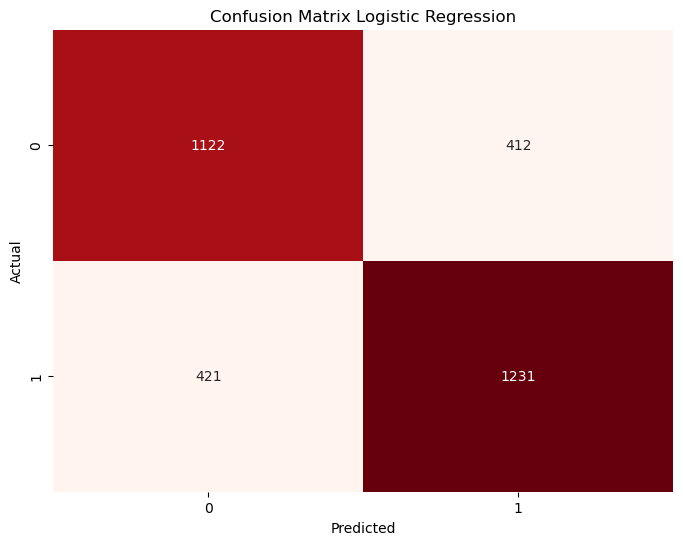

In [39]:
# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred1)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Reds', fmt='g', cbar=False)
plt.title('Confusion Matrix Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Keterangan Confution Matriks:
1. True Positive (TP): Jumlah nasabah yang benar-benar churn dan diprediksi dengan benar sebagai churn.
2. True Negative (TN): Jumlah nasabah yang benar-benar tidak churn dan diprediksi dengan benar sebagai tidak churn.
3. False Positive (FP): Jumlah nasabah yang tidak churn namun salah diprediksi sebagai churn.
4. False Negative (FN): Jumlah nasabah yang churn namun salah diprediksi sebagai tidak churn.

- Ada 1122 Jumlah nasabah yang benar-benar churn dan diprediksi dengan benar sebagai churn. (True Positif)
- Ada 1265 Jumlah nasabah yang benar-benar tidak churn dan diprediksi dengan benar sebagai tidak churn. (True Negative)
- Ada 412 Jumlah nasabah yang tidak churn namun salah diprediksi sebagai churn. (False Positive).
- Ada 387 Jumlah nasabah yang churn namun salah diprediksi sebagai tidak churn. (False Negative).

### 2. Support Vector Machines

In [40]:
#Import svm model
from sklearn.svm import SVC

In [41]:
# Inisialisasi dan latih model SVM
svm_model = SVC(kernel='linear', C=1.0, random_state=42)
svm_model.fit(X_train, y_train)

# Lakukan prediksi pada data uji
y_pred2 = svm_model.predict(X_test)

In [42]:
# Evaluasi model
print("Accuracy:", accuracy_score(y_test, y_pred2))
print(classification_report(y_test, y_pred2))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred2)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.7391713747645952
              precision    recall  f1-score   support

           0       0.73      0.73      0.73      1534
           1       0.75      0.75      0.75      1652

    accuracy                           0.74      3186
   macro avg       0.74      0.74      0.74      3186
weighted avg       0.74      0.74      0.74      3186

Confusion Matrix:
[[1122  412]
 [ 419 1233]]


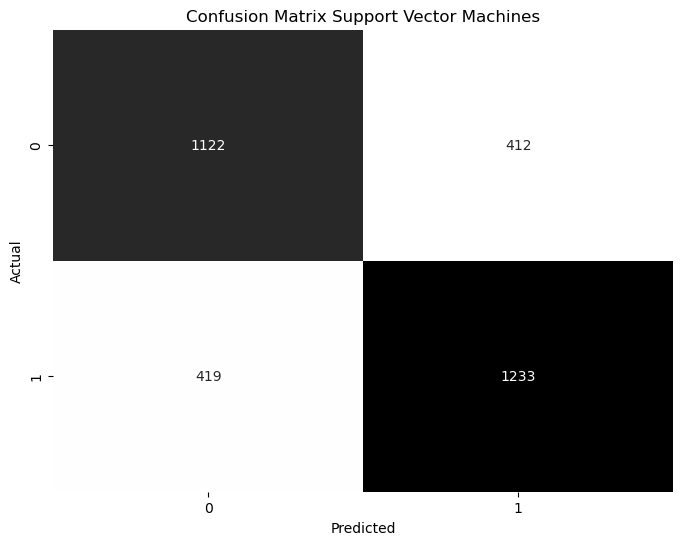

In [43]:
# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred2)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Greys', fmt='g', cbar=False)
plt.title('Confusion Matrix Support Vector Machines')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

- Ada 1114 Jumlah nasabah yang benar-benar churn dan diprediksi dengan benar sebagai churn. (True Positif)
- Ada 1262 Jumlah nasabah yang benar-benar tidak churn dan diprediksi dengan benar sebagai tidak churn. (True Negative)
- Ada 420 Jumlah nasabah yang tidak churn namun salah diprediksi sebagai churn. (False Positive).
- Ada 390 Jumlah nasabah yang churn namun salah diprediksi sebagai tidak churn. (False Negative).

### 3. Random Forest

In [44]:
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier

# Instantiate model with 1000 decision trees
rf_model = RandomForestClassifier(n_estimators = 1000, random_state = 42)

# Train the model on training data
rf_model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=1000, random_state=42)

In [45]:
# Lakukan prediksi pada data uji
y_pred3 = rf_model.predict(X_test)

In [46]:
# Evaluasi model
print("Accuracy:", accuracy_score(y_test, y_pred3))
print(classification_report(y_test, y_pred3))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred3)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.8527934714375393
              precision    recall  f1-score   support

           0       0.85      0.84      0.85      1534
           1       0.86      0.86      0.86      1652

    accuracy                           0.85      3186
   macro avg       0.85      0.85      0.85      3186
weighted avg       0.85      0.85      0.85      3186

Confusion Matrix:
[[1296  238]
 [ 231 1421]]


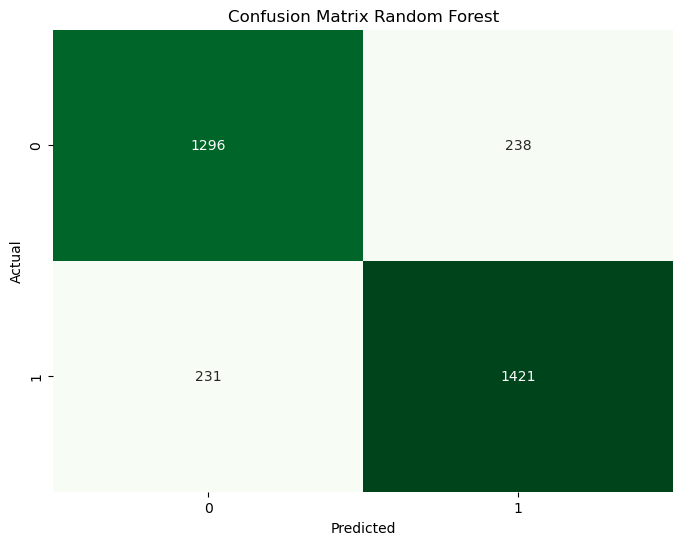

In [47]:
# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred3)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Greens', fmt='g', cbar=False)
plt.title('Confusion Matrix Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

- Ada 1304 Jumlah nasabah yang benar-benar churn dan diprediksi dengan benar sebagai churn. (True Positif)
- Ada 1407 Jumlah nasabah yang benar-benar tidak churn dan diprediksi dengan benar sebagai tidak churn. (True Negative)
- Ada 230 Jumlah nasabah yang tidak churn namun salah diprediksi sebagai churn. (False Positive).
- Ada 245 Jumlah nasabah yang churn namun salah diprediksi sebagai tidak churn. (False Negative).

### 4. K-Nearest Neighbors (KNN)

In [48]:
from sklearn.neighbors import KNeighborsClassifier

In [49]:
# Inisialisasi dan latih model KNN
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Lakukan prediksi pada data uji
y_pred4 = knn_model.predict(X_test)

In [50]:
# Evaluasi model
print("Accuracy:", accuracy_score(y_test, y_pred4))
print(classification_report(y_test, y_pred4))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred4)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.8113622096672944
              precision    recall  f1-score   support

           0       0.82      0.78      0.80      1534
           1       0.80      0.84      0.82      1652

    accuracy                           0.81      3186
   macro avg       0.81      0.81      0.81      3186
weighted avg       0.81      0.81      0.81      3186

Confusion Matrix:
[[1198  336]
 [ 265 1387]]


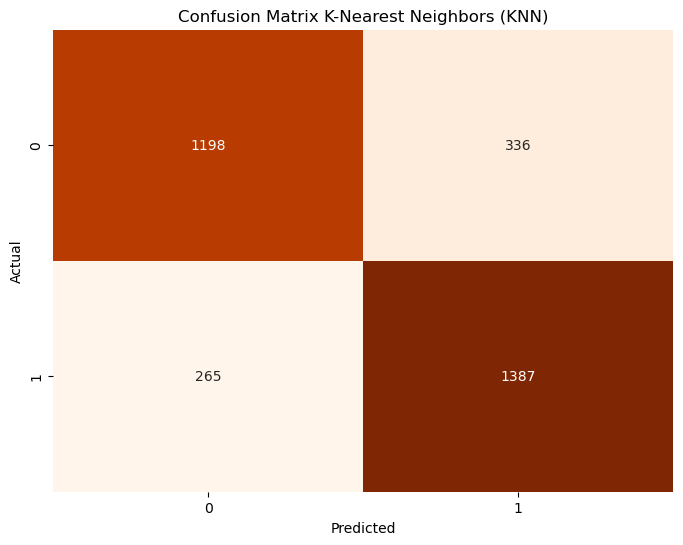

In [51]:
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred4)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Oranges', fmt='g', cbar=False)
plt.title('Confusion Matrix K-Nearest Neighbors (KNN)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

- Ada 1207 Jumlah nasabah yang benar-benar churn dan diprediksi dengan benar sebagai churn. (True Positif)
- Ada 1361 Jumlah nasabah yang benar-benar tidak churn dan diprediksi dengan benar sebagai tidak churn. (True Negative)
- Ada 327 Jumlah nasabah yang tidak churn namun salah diprediksi sebagai churn. (False Positive).
- Ada 291 Jumlah nasabah yang churn namun salah diprediksi sebagai tidak churn. (False Negative).

### 5. Decision Tree

In [52]:
from sklearn.tree import DecisionTreeClassifier

In [53]:
# Inisialisasi dan latih model Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Lakukan prediksi pada data uji
y_pred5 = dt_model.predict(X_test)

In [54]:
# Evaluasi model
print("Accuracy:", accuracy_score(y_test, y_pred5))
print(classification_report(y_test, y_pred5))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred5)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.7727558066541117
              precision    recall  f1-score   support

           0       0.76      0.77      0.76      1534
           1       0.78      0.78      0.78      1652

    accuracy                           0.77      3186
   macro avg       0.77      0.77      0.77      3186
weighted avg       0.77      0.77      0.77      3186

Confusion Matrix:
[[1175  359]
 [ 365 1287]]


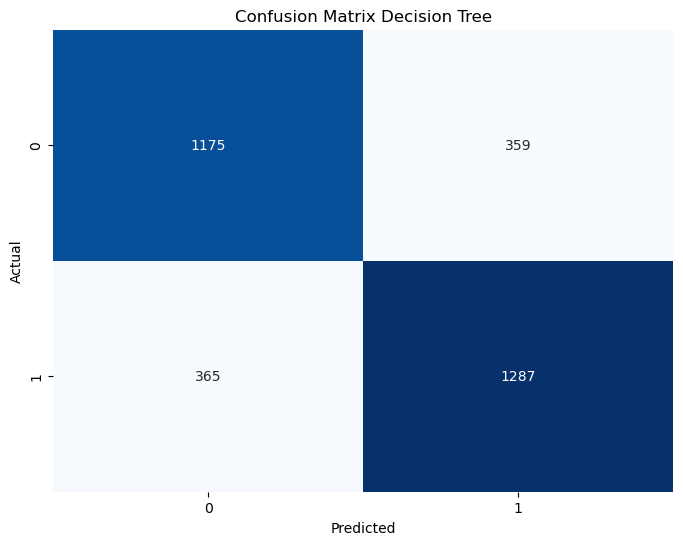

In [55]:
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred5)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.title('Confusion Matrix Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

- Ada 1169 Jumlah nasabah yang benar-benar churn dan diprediksi dengan benar sebagai churn. (True Positif)
- Ada 1317 Jumlah nasabah yang benar-benar tidak churn dan diprediksi dengan benar sebagai tidak churn. (True Negative)
- Ada 365 Jumlah nasabah yang tidak churn namun salah diprediksi sebagai churn. (False Positive).
- Ada 335 Jumlah nasabah yang churn namun salah diprediksi sebagai tidak churn. (False Negative).

### 6. Neural Networks

In [56]:
from keras.models import Sequential
from keras.layers import Dense

In [57]:
# Inisialisasi model Sequential
model = Sequential()

# Tambahkan layer input dan layer tersembunyi
model.add(Dense(12, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(8, activation='relu'))

In [58]:
# Tambahkan layer output
model.add(Dense(1, activation='sigmoid'))

In [59]:
# Kompilasi model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Latih model
model.fit(X_train, y_train, epochs=80, batch_size=10, verbose=1)



Epoch 1/80


1274/1274 [==============================] - 8s 4ms/step - loss: 0.5467 - accuracy: 0.7157
Epoch 2/80
1274/1274 [==============================] - 5s 4ms/step - loss: 0.4749 - accuracy: 0.7717
Epoch 3/80
1274/1274 [==============================] - 5s 4ms/step - loss: 0.4527 - accuracy: 0.7874
Epoch 4/80
1274/1274 [==============================] - 5s 4ms/step - loss: 0.4371 - accuracy: 0.7968
Epoch 5/80
1274/1274 [==============================] - 5s 4ms/step - loss: 0.4282 - accuracy: 0.8034
Epoch 6/80
1274/1274 [==============================] - 6s 5ms/step - loss: 0.4220 - accuracy: 0.8062
Epoch 7/80
1274/1274 [==============================] - 5s 4ms/step - loss: 0.4192 - accuracy: 0.8042
Epoch 8/80
1274/1274 [==============================] - 5s 4ms/step - loss: 0.4160 - accuracy: 0.8071
Epoch 9/80
1274/1274 [==============================] - 5s 4ms/step - loss: 0.4134 - accuracy: 0.8061
Epoch 10/80
1274/1274 [==============================] - 5s 4ms/step - loss: 0.

1274/1274 [==============================] - 4s 3ms/step - loss: 0.3947 - accuracy: 0.8202
Epoch 75/80
1274/1274 [==============================] - 5s 4ms/step - loss: 0.3938 - accuracy: 0.8226
Epoch 76/80
1274/1274 [==============================] - 4s 3ms/step - loss: 0.3938 - accuracy: 0.8185
Epoch 77/80
1274/1274 [==============================] - 4s 4ms/step - loss: 0.3933 - accuracy: 0.8221
Epoch 78/80
1274/1274 [==============================] - 4s 3ms/step - loss: 0.3940 - accuracy: 0.8220
Epoch 79/80
1274/1274 [==============================] - 4s 3ms/step - loss: 0.3933 - accuracy: 0.8213
Epoch 80/80
1274/1274 [==============================] - 4s 3ms/step - loss: 0.3936 - accuracy: 0.8205


In [60]:
# Evaluasi model pada data uji
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy:', accuracy)

100/100 [==============================] - 1s 3ms/step - loss: 0.3977 - accuracy: 0.8211
Accuracy: 0.8210923075675964


In [61]:
# Lakukan prediksi probabilitas pada data uji
y_pred_proba = model.predict(X_test)

# Ambil kelas dengan probabilitas tertinggi sebagai prediksi
y_pred6 = (y_pred_proba > 0.5).astype(int)

# Evaluasi model
print("Accuracy:", accuracy_score(y_test, y_pred6))
print(classification_report(y_test, y_pred6))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred6)
print("Confusion Matrix:")
print(conf_matrix)

100/100 [==============================] - 0s 3ms/step
Accuracy: 0.8210922787193974
              precision    recall  f1-score   support

           0       0.82      0.81      0.81      1534
           1       0.83      0.83      0.83      1652

    accuracy                           0.82      3186
   macro avg       0.82      0.82      0.82      3186
weighted avg       0.82      0.82      0.82      3186

Confusion Matrix:
[[1243  291]
 [ 279 1373]]


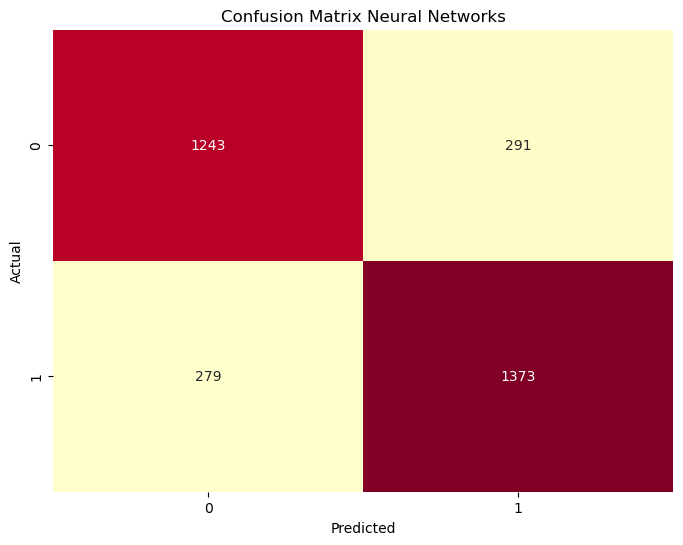

In [62]:
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred6)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='YlOrRd', fmt='g', cbar=False)
plt.title('Confusion Matrix Neural Networks')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

- Ada 1242 Jumlah nasabah yang benar-benar churn dan diprediksi dengan benar sebagai churn. (True Positif)
- Ada 1364 Jumlah nasabah yang benar-benar tidak churn dan diprediksi dengan benar sebagai tidak churn. (True Negative)
- Ada 292 Jumlah nasabah yang tidak churn namun salah diprediksi sebagai churn. (False Positive).
- Ada 288 Jumlah nasabah yang churn namun salah diprediksi sebagai tidak churn. (False Negative).

## Model Selection | Pemilihan Model

In [63]:
model_names = ['Logistic Regression', 'Support Vector Machines', 'Random Forest', 'K-Nearest Neighbors(KNN)', 'Decision Tree', 'Neural Networks']
accuracies = [accuracy_score(y_test, y_pred1),
              accuracy_score(y_test, y_pred2),
              accuracy_score(y_test, y_pred3),
              accuracy_score(y_test, y_pred4),
              accuracy_score(y_test, y_pred5),
              accuracy_score(y_test, y_pred6)]
precisions = [precision_score(y_test, y_pred1),
              precision_score(y_test, y_pred2),
              precision_score(y_test, y_pred3),
              precision_score(y_test, y_pred4),
              precision_score(y_test, y_pred5),
              precision_score(y_test, y_pred6)]

model_selection = pd.DataFrame({'Models': model_names, 'Accuracy': accuracies, 'Precision': precisions})
model_selection


,Models,Accuracy,Precision
0,Logistic Regression,0.738544,0.749239
1,Support Vector Machines,0.739171,0.749544
2,Random Forest,0.852793,0.856540
3,K-Nearest Neighbors(KNN),0.811362,0.804991
4,Decision Tree,0.772756,0.781896
5,Neural Networks,0.821092,0.825120


### Dari 6 Model yang di coba, model terbaik yaitu Model Random Forest dengan Accuracy = 0.850910	dan Precision = 0.859499 dengan Confution Matrix sebagai berikut.

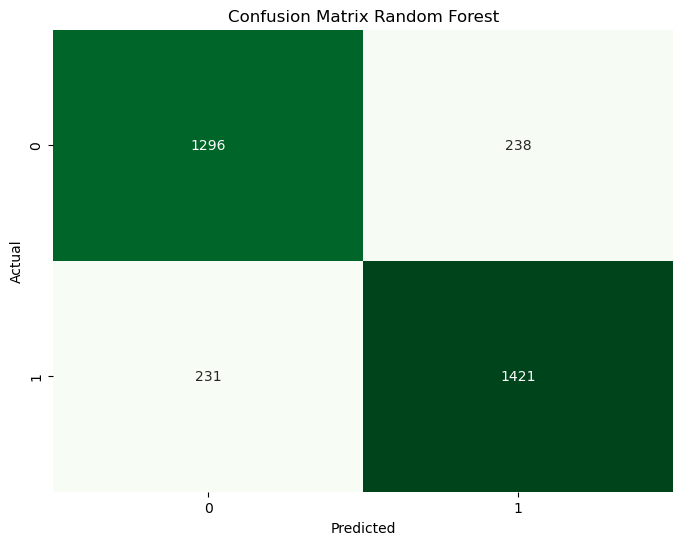

In [64]:
# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred3)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Greens', fmt='g', cbar=False)
plt.title('Confusion Matrix Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

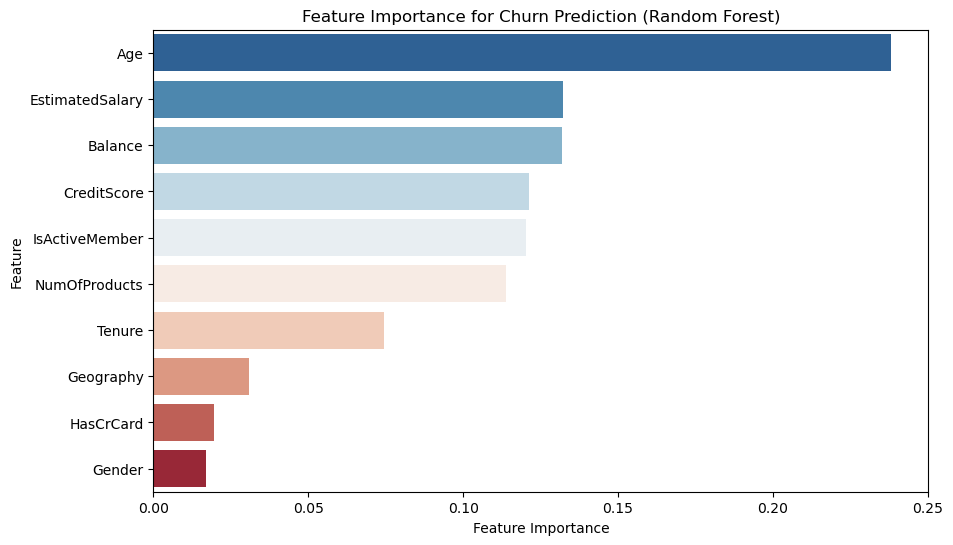

In [65]:
# Get feature importances from the model
feature_importance = rf_model.feature_importances_

# Get feature names
feature_names = X.columns

# Sort feature importances in descending order
sorted_idx = feature_importance.argsort()[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance[sorted_idx], y=feature_names[sorted_idx], palette="RdBu_r")
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for Churn Prediction (Random Forest)')
plt.show()


## Conclusion | Kesimpulan

Dapat disimpulkan bahwa dari perbandingan 6 model digunakan yaitu Logistic Regression, Support Vector Machines, Random Forest, K-Nearest Neighbors(KNN), Decision Tree dan Neural Networks. Model terbaik untuk menganalisis prediksi churn bank dari dataset tersebut yaitu pada model Random Forest dengan nilai Accuracy dan Precision tertinggi. Didapatkan informasi dari confution matrix yaitu
- Ada 1304 Jumlah nasabah yang benar-benar churn dan diprediksi dengan benar sebagai churn. (True Positif)
- Ada 1407 Jumlah nasabah yang benar-benar tidak churn dan diprediksi dengan benar sebagai tidak churn. (True Negative)
- Ada 230 Jumlah nasabah yang tidak churn namun salah diprediksi sebagai churn. (False Positive).
- Ada 245 Jumlah nasabah yang churn namun salah diprediksi sebagai tidak churn. (False Negative).

Dilihat dari grafik Feature Importance for Churn Prediction (Random Forest) di dapatkan bahwa semakin tinggi nilai Feature Importance suatu fitur dalam model Random Forest, semakin besar kontribusi fitur tersebut terhadap kemampuan model untuk membuat prediksi. Dengan kata lain, fitur tersebut memiliki pengaruh yang lebih besar dalam membedakan antara kelas-kelas target (misalnya, churn dan tidak churn).

In [67]:
import joblib 

# save model with joblib 
filename = 'Randomforest_model.sav'
joblib.dump(rf_model, filename)
print(f"Model saved to {filename}")

Model saved to Randomforest_model.sav
